In [1]:
from CRM.classical_crm import *

# Introduction to the Classical Consumer-Resource Model (CRM)

Understanding the dynamics of ecological communities requires a mechanistic framework that links the availability of environmental resources to the growth and persistence of species. One of the foundational models in theoretical ecology for studying these interactions is the Consumer-Resource Model (CRM), originally introduced by Robert MacArthur in the 1970s. This model captures how species compete for a shared pool of abiotic or biotic resources and how the availability of those resources influences population dynamics. In the classical CRM, species grow proportionally to the resources they consume, and resource consumption reduces the availability of those resources. This framework has been instrumental in studying niche differentiation, coexistence, and competitive exclusion in ecological systems.

Let us consider *S* species indexed by i = 1, $\dots$, *S*, and *M* types of resources indexed by $\alpha$ = 1, $\dots$, *M*. 

The classical deterministic formulation of the CRM is given by the following system of ordinary differential equations:

\begin{aligned}
\frac{dN_i}{dt} &= \tau_i^{-1} N_i \left( \sum_{\alpha=1}^{M} w_{\alpha} c_{i\alpha} R_{\alpha} - m_i \right), && i = 1, \dots, S \\
\frac{dR_{\alpha}}{dt} &= \frac{r_{\alpha}}{K_{\alpha}} (K_{\alpha} - R_{\alpha}) R_{\alpha} - \sum_{i=1}^{S} N_i c_{i\alpha} R_{\alpha}, && \alpha = 1, $\dots$, $M$
\end{aligned}

Here:
	-	$ N_i(t)$   is the population size of species $ i $,
	-	$R_\alpha(t)$ is the concentration of resource $\alpha$,
	-	$c_{i\alpha}$ is the consumption rate of resource $\alpha$ by species $i$,
	-	$w_\alpha$ is the efficiency with which resource $\alpha$ is converted into biomass,
	-	$m_i$ is the maintenance cost for species $i$,
	-	$\tau_i$ is a timescale factor (e.g., generation time),
	-	$r_\alpha$ is the intrinsic growth rate of resource $\alpha$,
	-	$K_\alpha$ is the carrying capacity of resource $\alpha$.

In this model, species increase their biomass through resource uptake, subject to a maintenance cost, and resource concentrations follow logistic self-renewal while being depleted through consumption. The interaction between resource regeneration and consumption creates nonlinear feedback that governs community dynamics. This formulation assumes that all interactions are mediated through resource competition, making it a neutral and flexible foundation for exploring ecological dynamics such as coexistence, competitive exclusion, niche partitioning, and the emergence of community structure.


Simulating the classical MacArthur CRM with logistic resource growth...


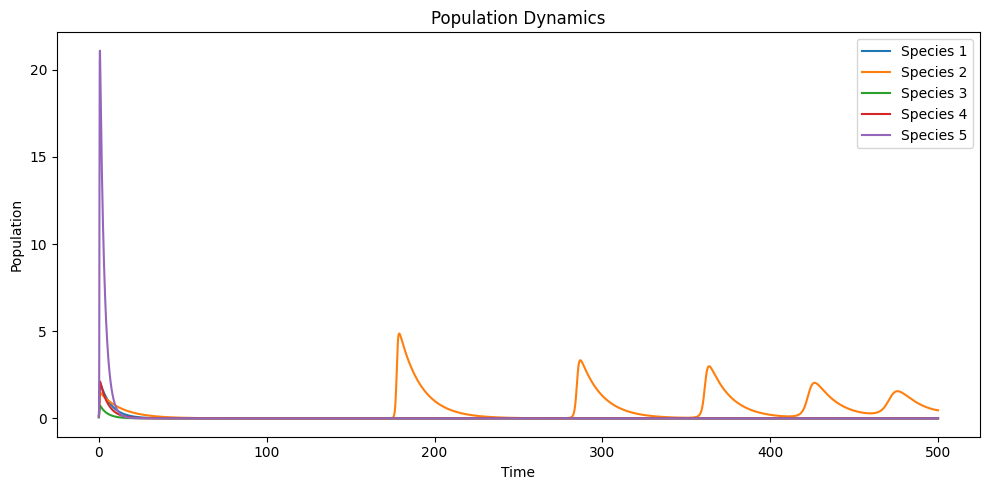

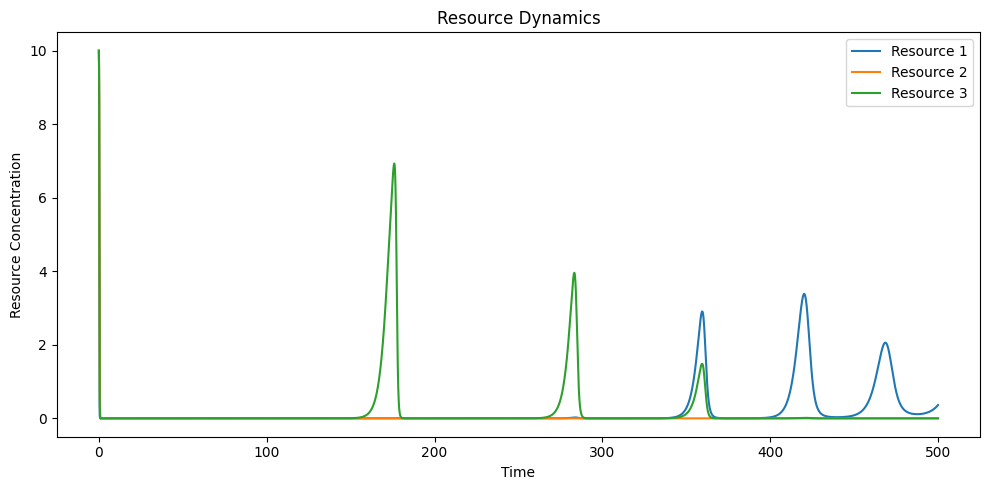

In [2]:
# Parameters
num_species = 5
num_resources = 3

np.random.seed(42)
params = {
    "tau": np.random.uniform(0.5, 1.5, num_species),
    "m":   np.random.uniform(0.1, 0.3, num_species),
    "w":   np.random.uniform(0.5, 1.0, num_resources),
    "c":   np.random.uniform(0.1, 1.0, (num_species, num_resources)),
    "K":   np.full(num_resources, 10.0),
    "r":   np.random.uniform(0.1, 0.5, num_resources)
}

# Custom initial conditions
initial_N = np.array([0.2, 0.1, 0.05, 0.1, 0.1])
initial_R = np.array([10.0, 10.0, 10.0])

try1 = simulate_crm(params, num_species=5, num_resources=3, timesteps=50000, dt=0.01, initial_N=initial_N, initial_R=initial_R, resource_mode='logistic')

# Externally Supplied Consumer-Resource Model

The externally supplied Consumer-Resource Model (CRM) describes ecosystems where resources are maintained by a constant external input rather than by self-renewal. This setup is typical of environments such as chemostats, host-fed systems, or open aquatic and soil ecosystems with continuous nutrient inflow.

The species and resource dynamics are given by:

\begin{aligned}
\frac{dN_i}{dt} &= \tau_i^{-1} N_i \left( \sum_{\alpha=1}^{M} w_{\alpha} c_{i\alpha} R_{\alpha} - m_i \right), \quad && i = 1, \dots, S \\
\frac{dR_\alpha}{dt} &= r_\alpha (\kappa_\alpha - R_\alpha) - \sum_{i=1}^{S} N_i c_{i\alpha} R_\alpha, \quad && \alpha = 1, \dots, M
\end{aligned}

This formulation links externally buffered resource supply to species growth via resource uptake, enabling analysis of competition, exclusion, and coexistence in controlled or open ecosystems.

Simulating CRM with externally supplied resources (mass-action depletion)...


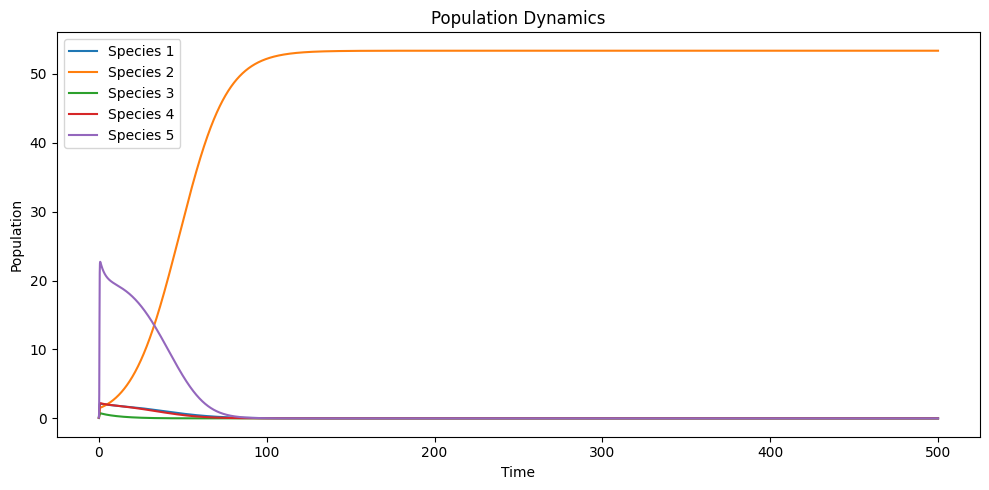

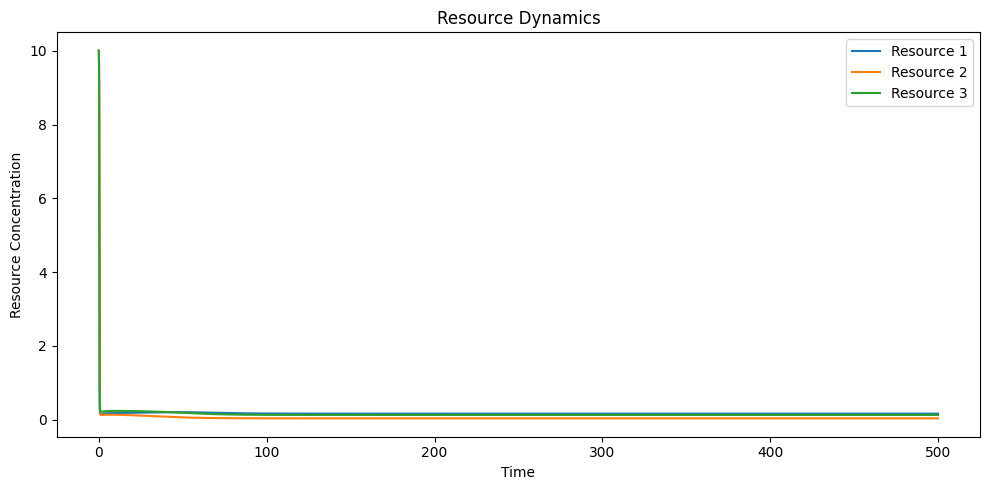

In [3]:
try2 = simulate_crm(params, num_species=5, num_resources=3, timesteps=50000, dt=0.01, initial_N=initial_N, initial_R=initial_R, resource_mode='external')

Simulating Tilman's CRM with externally supplied resources and constant-rate consumption...


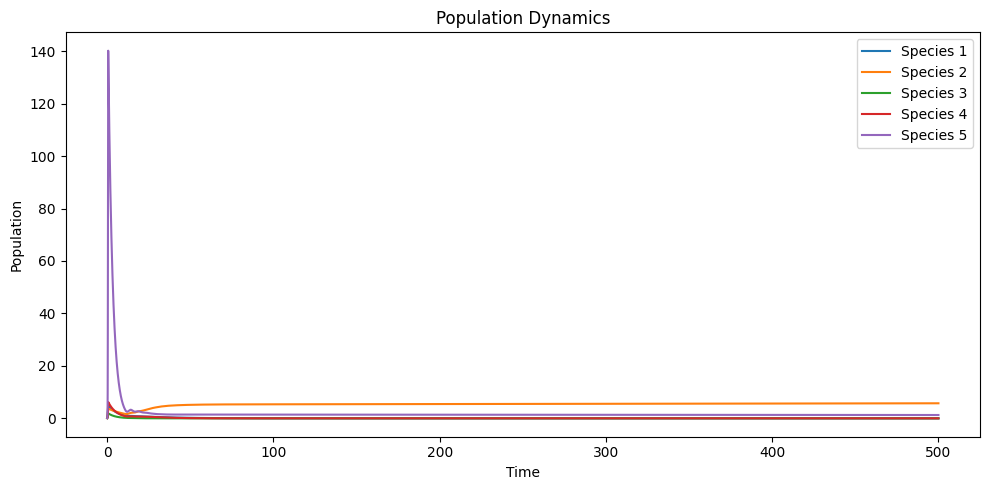

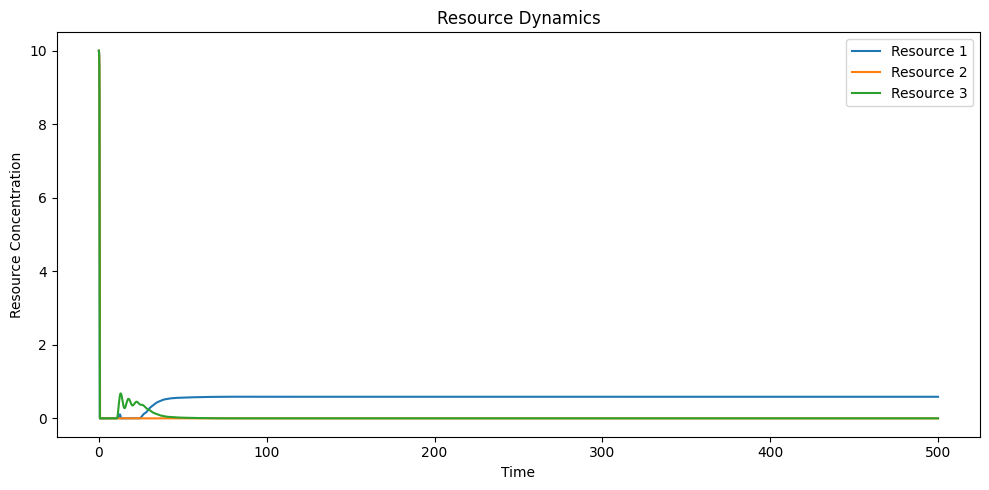

In [9]:
try3 = simulate_crm(params, num_species=5, num_resources=3, timesteps=50000, dt=0.01, initial_N=initial_N, initial_R=initial_R, resource_mode='tilman')

Generating parameters for scenario: High Resource Availability
Simulating the classical MacArthur CRM with logistic resource growth...


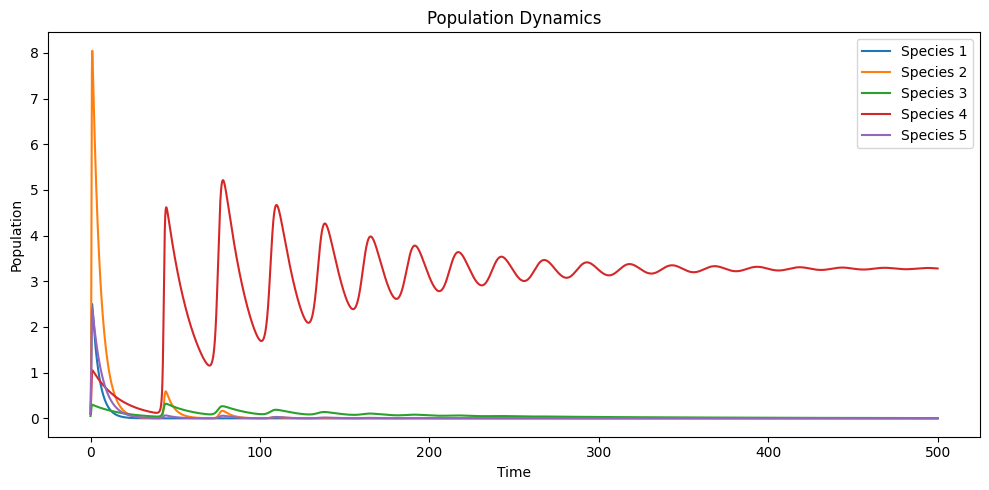

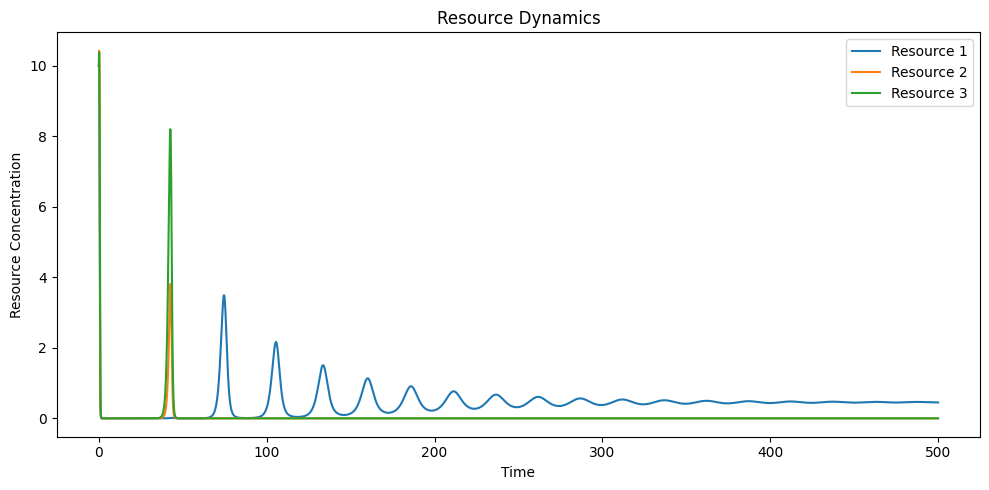

In [15]:
try4 = simulate_crm(params, num_species=5, num_resources=3, timesteps=50000, dt=0.01, initial_N=initial_N, initial_R=initial_R, resource_mode='logistic', scenario_name="High Resource Availability")

Generating parameters for scenario: Niche Specialization
Simulating the classical MacArthur CRM with logistic resource growth...


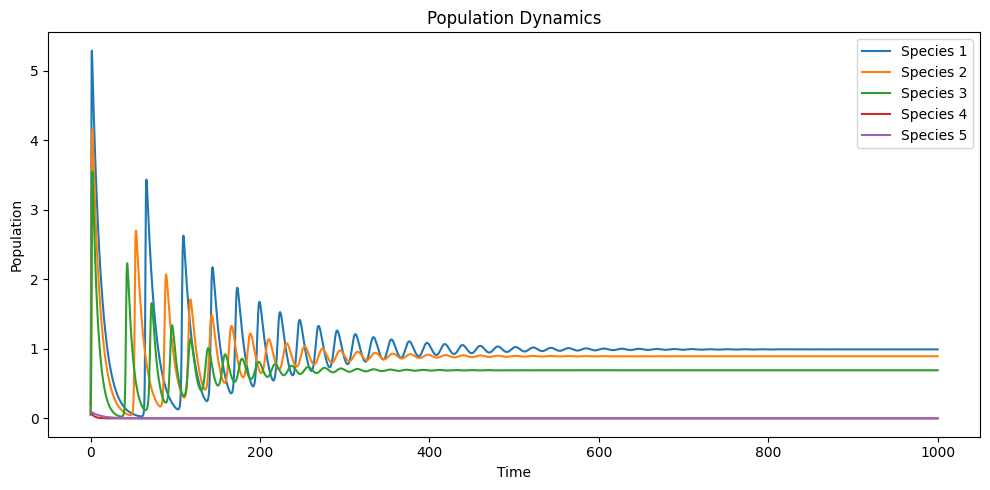

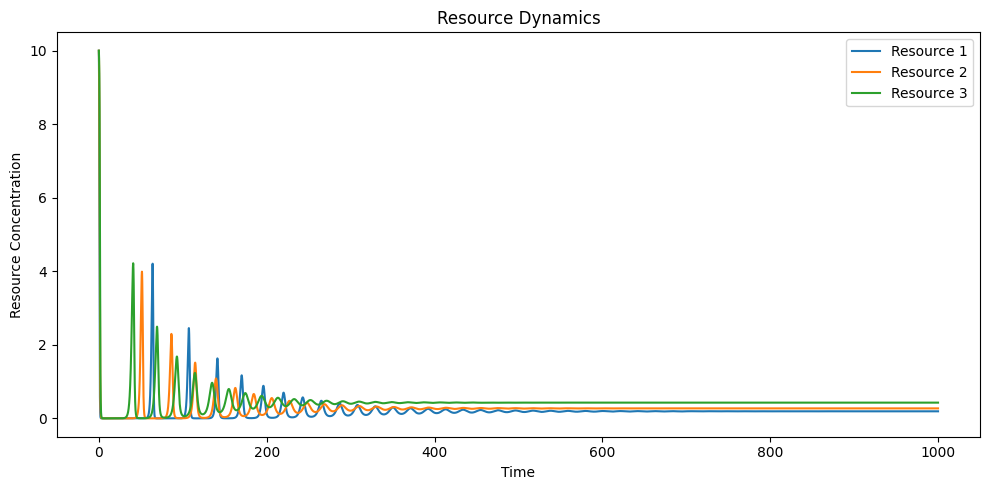

In [12]:
try5 = simulate_crm(params, num_species=5, num_resources=3, timesteps=100000, dt=0.01, initial_N=initial_N, initial_R=initial_R, resource_mode='logistic', scenario_name="Niche Specialization")